In [11]:
import pandas as pd

In [12]:
# 1. 데이터 수집
# 캐글사이트 https://www.kaggle.com/c/titanic/data
# 2. 데이터 분류(훈련, 테스트...)
train= pd.read_csv("c:/sample/train.csv") # 기계학습 데이터
test = pd.read_csv("c:/sample/test.csv") # 예측에 사용할 데이터

In [13]:
# 트레인 데이터 훈련
print(train.info())
print(train.shape)
print(train.isnull())
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)
     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   Fals

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# 3. 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64
          female  male
Survived     233   109
Dead          81   468


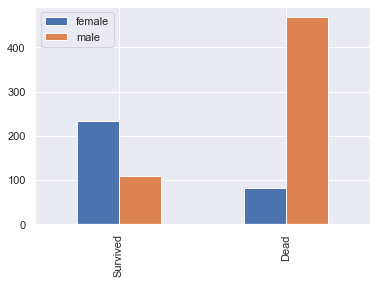

In [19]:
survived_sex = train[train["Survived"] == 1]["Sex"].value_counts()
print(survived_sex)
dead_sex = train[train["Survived"] == 0]["Sex"].value_counts()
print(dead_sex)
df_sex = pd.DataFrame([survived_sex, dead_sex], index = ["Survived", "Dead"])
print(df_sex)
df_sex.plot(kind = "bar")

1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64
            1   2    3
Survived  136  87  119
Dead       80  97  372


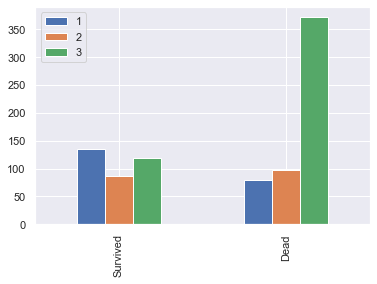

In [20]:
survived_pclass = train[train["Survived"] == 1]["Pclass"].value_counts()
print(survived_pclass)
dead_pclass = train[train["Survived"] == 0]["Pclass"].value_counts()
print(dead_pclass)
df_pclass = pd.DataFrame([survived_pclass, dead_pclass], index = ["Survived", "Dead"])
print(df_pclass)
df_pclass.plot(kind = "bar")

1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64
              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


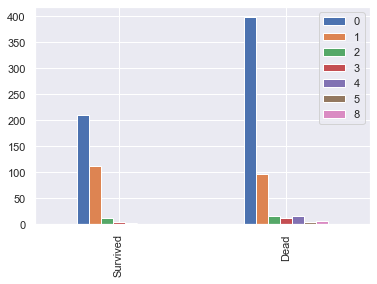

In [21]:
survived_sibsp = train[train["Survived"] == 1]["SibSp"].value_counts()
print(survived_pclass)
dead_sibsp = train[train["Survived"] == 0]["SibSp"].value_counts()
print(dead_pclass)
df_sibsp = pd.DataFrame([survived_sibsp, dead_sibsp], index = ["Survived", "Dead"])
print(df_sibsp)
df_sibsp.plot(kind = "bar")

S    217
C     93
Q     30
Name: Embarked, dtype: int64
S    427
C     75
Q     47
Name: Embarked, dtype: int64
            S   C   Q
Survived  217  93  30
Dead      427  75  47


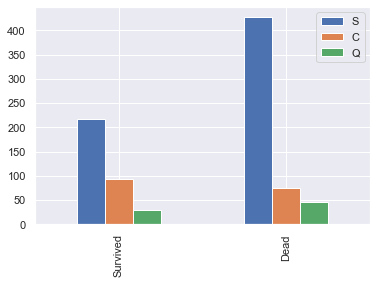

In [22]:
survived_embarked = train[train["Survived"] == 1]["Embarked"].value_counts()
print(survived_embarked)
dead_embarked = train[train["Survived"] == 0]["Embarked"].value_counts()
print(dead_embarked)
df_embarked = pd.DataFrame([survived_embarked, dead_embarked], index = ["Survived", "Dead"])
print(df_embarked)
df_embarked.plot(kind = "bar")

In [23]:
# 4. 데이터 전처리 -> 데이터 시각화
train_test_data = [train, test]

In [24]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [28]:
# 정규표현식 : 문자열 검색하는 문법
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.")
# train_test_data
# train["Title"].value_counts()
# for dataset in train_test_data: # type(train["Title"]시리즈 타입이라서 문자열과 당연히 같지 않다.
#     if dataset["Title"] == "Mr":
#         dataset["Title"] = 0
#     elif dataset["Title"] == "Miss":
#         dataset["Title"] = 1
#     elif dataset["Title"] == "Mrs":
#         dataset["Title"] = 2
#     else:
#         datset["Title"] = 3
#     print(dataset["Title"])
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [29]:
train["Title"]

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [30]:
train.drop("Name", axis = 1) # 행열 삭제 axis = 1(열), 0(행)
test.drop("Name", axis = 1) 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


1    127
2     99
0     81
3     35
Name: Title, dtype: int64
0    436
1     55
3     32
2     26
Name: Title, dtype: int64
            0    1   2   3
Survived   81  127  99  35
Dead      436   55  26  32


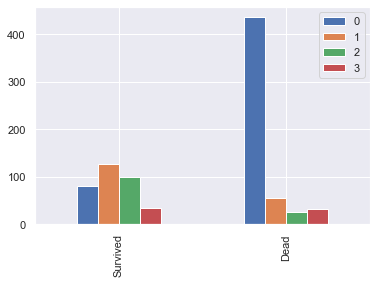

In [31]:
survived_title = train[train["Survived"] == 1]["Title"].value_counts()
print(survived_title)
dead_title = train[train["Survived"] == 0]["Title"].value_counts()
print(dead_title)
df_title = pd.DataFrame([survived_title, dead_title], index = ["Survived", "Dead"])
print(df_title)
df_title.plot(kind = "bar")

In [32]:
# 성별 데이터 전처리 male : 0, female : 1
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [33]:
train["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [34]:
train["Age"].isnull().sum()

177

In [35]:
val = train.groupby("Title")["Age"].median()
print(val)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)

Title
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64


In [36]:
train["Age"].isnull().sum()

0

In [37]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [38]:
train["Age"]
test["Age"]

0      2.0
1      3.0
2      3.0
3      2.0
4      1.0
      ... 
413    2.0
414    3.0
415    3.0
416    2.0
417    1.0
Name: Age, Length: 418, dtype: float64

1    127
2     99
0     81
3     35
Name: Title, dtype: int64
2.0    220
1.0    158
3.0    111
0.0     48
4.0     12
Name: Age, dtype: int64
          2.0  1.0  3.0  0.0  4.0
Survived  116   97   69   57    3
Dead      220  158  111   48   12


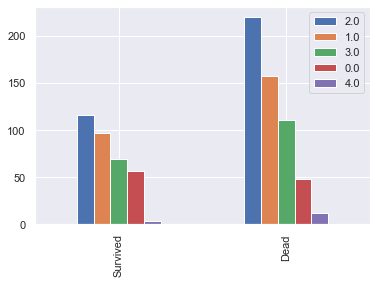

In [39]:
survived_age = train[train["Survived"] == 1]["Age"].value_counts()
print(survived_title)
dead_age = train[train["Survived"] == 0]["Age"].value_counts()
print(dead_age)
df_age = pd.DataFrame([survived_age, dead_age], index = ["Survived", "Dead"])
print(df_age)
df_age.plot(kind = "bar")

In [40]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [42]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

In [44]:
train["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [49]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [52]:
train["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

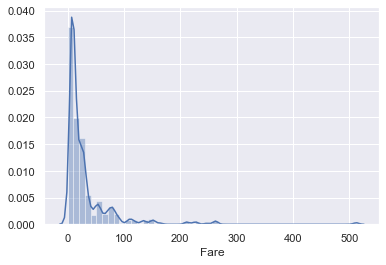

In [54]:
sns.distplot(train["Fare"])

In [55]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [57]:
train["Fare"]

0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
      ... 
886    0.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare, Length: 891, dtype: float64

In [61]:
train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
A32            1
E58            1
A6             1
C30            1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [62]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [63]:
train["Cabin"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [64]:
train["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [65]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping) #mapping cabin col

In [66]:
train["Cabin"].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [67]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,1.0,0.8,1,0


In [68]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [72]:
train["Parch"]

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [70]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,2.0,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,2.0,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,0.0,2.0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,3.0,0.8,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,0.0,2.0,0,0


In [74]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [77]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [78]:
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [79]:
#Scale of familysize is 1 - 11 

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [80]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,2.0,0,0,211536,0.0,1.8,0,3,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,1.0,0,0,112053,1.0,0.4,0,1,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,1.2
889,890,1,1,"Behr, Mr. Karl Howell",0,1.0,0,0,111369,1.0,0.8,1,0,0.0


In [81]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,2.0,0,0,A.5. 3236,0.0,2.0,0,0,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,3.0,0,0,PC 17758,3.0,0.8,1,3,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,0,0.0
416,1308,3,"Ware, Mr. Frederick",0,2.0,0,0,359309,0.0,2.0,0,0,0.0


In [87]:
train = train.drop("PassengerId", axis = 1)
train = train.drop("Name", axis = 1)
train = train.drop("SibSp", axis = 1)
train = train.drop("Parch", axis = 1)
train = train.drop("Ticket", axis = 1)

In [88]:
test = test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket"], axis = 1)

In [92]:
# 지도학습 -> 분류모델
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # 의사결정론
from sklearn.ensemble import RandomForestClassifier # 랜던포레스트
from sklearn.naive_bayes import GaussianNB # 나이브베이즈
from sklearn.svm import SVC # 서포트벡터머신
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [93]:
# k개의 가장근접한 이웃값
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [94]:
train_data = train.drop("Survived", axis = 1)
scoring
target = train["Survived"]

In [107]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn_score = cross_val_score(knn, train_data, target, cv = k_fold, n_jobs = 1, scoring = "accuracy")
knn_score

array([0.82222222, 0.76404494, 0.80898876, 0.83146067, 0.87640449,
       0.82022472, 0.85393258, 0.79775281, 0.84269663, 0.84269663])

In [108]:
np.mean(knn_score)*100

82.60424469413232

In [109]:
# 의사결정나무
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, train_data, target, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(dt_score)
np.mean(dt_score)*100

[0.76666667 0.83146067 0.78651685 0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


79.80149812734084

In [110]:
# 랜덤포레스트 (의사결정나무가 모인거 =: 보완)
rf = RandomForestClassifier(n_estimators = 13)
rf_score = cross_val_score(rf, train_data, target, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(rf_score)
np.mean(rf_score) * 100

[0.78888889 0.85393258 0.83146067 0.78651685 0.85393258 0.78651685
 0.82022472 0.79775281 0.78651685 0.83146067]


81.37203495630463

In [111]:
# 나이브베이즈
nb = GaussianNB()
nb_score = cross_val_score(nb, train_data, target, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(nb_score)
np.mean(nb_score) * 100

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78027465667914

In [114]:
# 서포트벡터머신
svc = SVC(C = 1, kernel = "rbf", coef0 = 1)
svc_score = cross_val_score(svc, train_data, target, cv = k_fold, n_jobs = 1, scoring = "accuracy")
print(svc_score)
round(np.mean(svc_score) * 100, 2)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

83.5

In [115]:
model = SVC(C = 1, kernel = "rbf", coef0 = 1)
model.fit(train_data, target)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [116]:
prediction = model.predict(test)

In [118]:
import collections, numpy
collections.Counter(prediction)

Counter({0: 259, 1: 159})